<a href="https://colab.research.google.com/github/Jinyu-Luo/CHL5230-Datathon1/blob/main/Datathon_1_BMI_Lily_Edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# set up libraries

from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

uploaded = files.upload()

In [ ]:
from pandas.io.stata import BytesIO
# Read dataset into Pandas dataframe
data = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))

# display first few rows of data
data.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
# Info on data
print(data.shape)

print(data.columns)

(23535, 10)
Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')


In [ ]:
# Summary Statistics
print(data.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

In [ ]:
# Look at unique values for each variable

for column in data.columns:
  print(f"{column} : {sorted(data[column].unique())}")

 # age, caloric intake, sugar intake, physical activity, BMI are continuous
 # fast food, screen time is categorical

Age : [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
Gender : ['Female', 'Male']
Calorie_Intake : [1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 161

In [ ]:
# check for missing values
print(data.isnull().sum())

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64


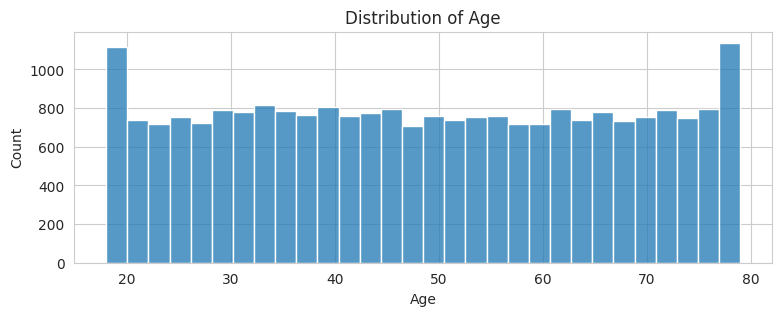

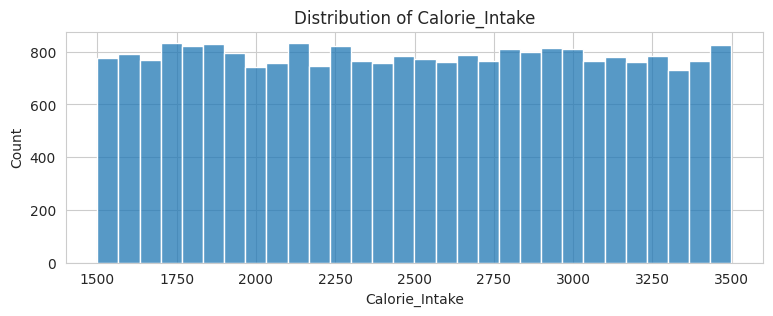

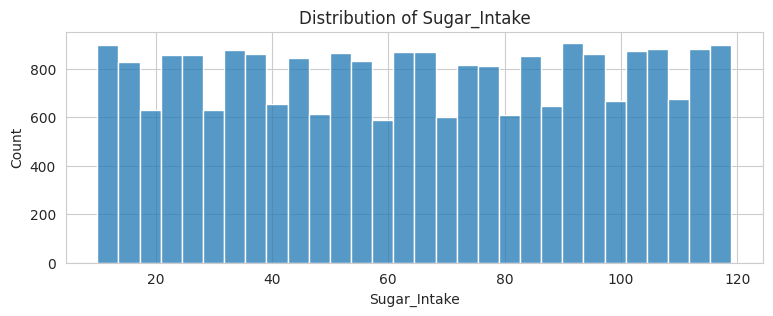

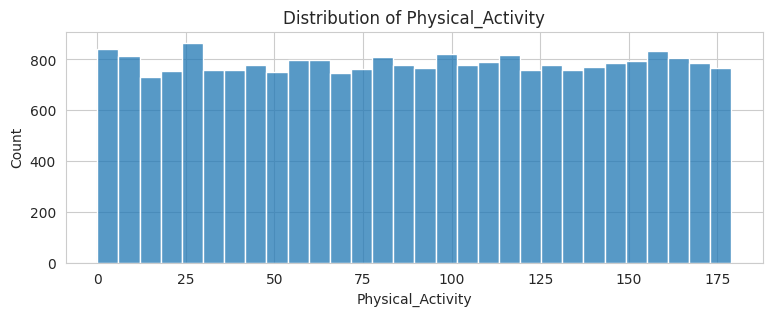

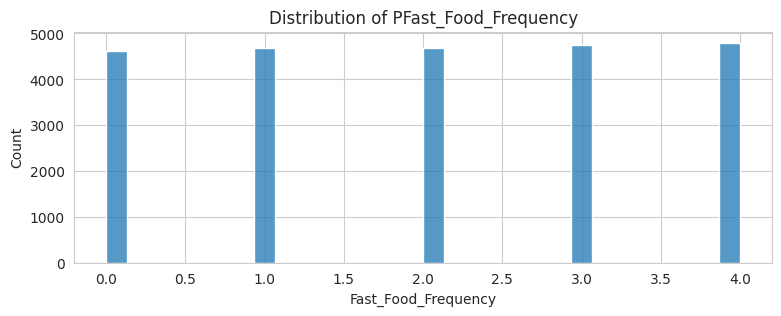

In [ ]:
# Visualize histograms for continuous data
sns.set_style('whitegrid')

plt.figure(figsize=(9,3))
sns.histplot(data["Age"], bins = 30, kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data["Calorie_Intake"], bins = 30, kde=False)
plt.title('Distribution of Calorie_Intake')
plt.xlabel('Calorie_Intake')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data["Sugar_Intake"], bins = 30, kde=False)
plt.title('Distribution of Sugar_Intake')
plt.xlabel('Sugar_Intake')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data["Physical_Activity"], bins = 30, kde=False)
plt.title('Distribution of Physical_Activity')
plt.xlabel('Physical_Activity')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data["Fast_Food_Frequency"], bins = 30, kde=False)
plt.title('Distribution of PFast_Food_Frequency')
plt.xlabel('Fast_Food_Frequency')
plt.ylabel("Count")
plt.show()

# All look pretty evenly distributed with exception of Age
# there are more very young and very old people


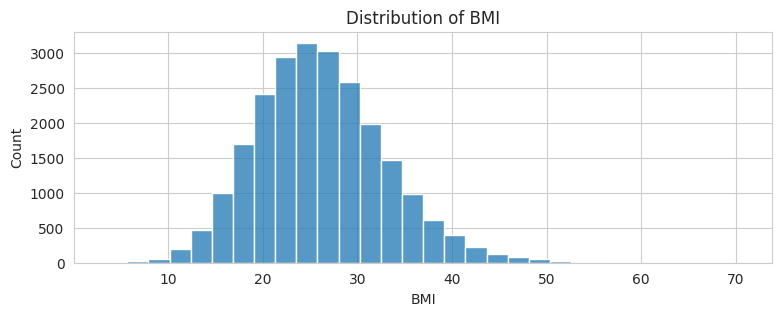

In [ ]:
# Distribtuion of BMI

plt.figure(figsize=(9,3))
sns.histplot(data["BMI"], bins = 30, kde=False)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel("Count")
plt.show()

# follows normal distribution

In [ ]:
# Re-coding BMI into categories
def bmi_categorize(bmi):
  if bmi < 18.5:
    return '0' # underweight
  elif 18.5 <= bmi < 25:
    return '1' # normal
  elif 25 <= bmi < 30:
    return '2' # overweight, moderate risk
  else:
    return '3' # obese, high risk

data['BMI_Cat'] = data["BMI"].apply(bmi_categorize)
data.head()


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,BMI_Cat
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343,3
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877,2
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417,2
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720,3
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685,2


In [ ]:
# Box Plot of BMI by Sex

fig_box = px.box(data, x = "Gender", y = "BMI", title = 'BMI grouped by gender', color = "Gender", color_discrete_sequence=['pink','blue'])
fig_box.update_layout(template="plotly_white")
fig_box.show()

In [ ]:
# Group dataset by Gender

data_female = data[data['Gender'] == 'Female']
data_female.head()
data_female.shape # a lot of data for female category

(14896, 11)

In [ ]:
data_male = data[data['Gender'] == 'Male']
data_male.head()
data_male.shape # not a lot of data for male category, models may be difficult

(8639, 11)

In [ ]:
# Distribtion for female group
plt.figure(figsize=(9,3))
sns.histplot(data_female["Age"], bins = 30, kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data_female["Calorie_Intake"], bins = 30, kde=False)
plt.title('Distribution of Calorie_Intake')
plt.xlabel('Calorie_Intake')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data_female["Sugar_Intake"], bins = 30, kde=False)
plt.title('Distribution of Sugar_Intake')
plt.xlabel('Sugar_Intake')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data_female["Physical_Activity"], bins = 30, kde=False)
plt.title('Distribution of Physical_Activity')
plt.xlabel('Physical_Activity')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data_female["BMI"], bins = 30, kde=False)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel("Count")
plt.show()

In [ ]:
# Distribtion for male group
plt.figure(figsize=(9,3))
sns.histplot(data_male["Age"], bins = 30, kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data_male["Calorie_Intake"], bins = 30, kde=False)
plt.title('Distribution of Calorie_Intake')
plt.xlabel('Calorie_Intake')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data_male["Sugar_Intake"], bins = 30, kde=False)
plt.title('Distribution of Sugar_Intake')
plt.xlabel('Sugar_Intake')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data_male["Physical_Activity"], bins = 30, kde=False)
plt.title('Distribution of Physical_Activity')
plt.xlabel('Physical_Activity')
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,3))
sns.histplot(data_male["BMI"], bins = 30, kde=False)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel("Count")
plt.show()

In [ ]:
# KNN model Female

# split data into features and labels
X = data_female[["Age","Calorie_Intake","Sugar_Intake","Physical_Activity",'Fast_Food_Frequency']]
y = data_female["BMI_Cat"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn.fit(X_train, y_train)

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[912 272 141]
 [562 178 101]
 [544 166 104]]
              precision    recall  f1-score   support

           0       0.45      0.69      0.55      1325
           1       0.29      0.21      0.24       841
           2       0.30      0.13      0.18       814

    accuracy                           0.40      2980
   macro avg       0.35      0.34      0.32      2980
weighted avg       0.36      0.40      0.36      2980



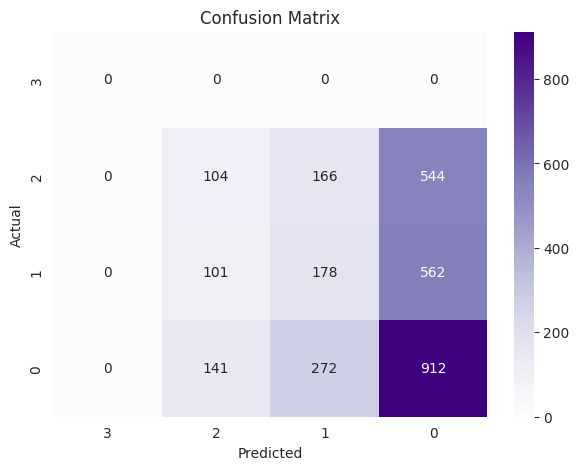

In [ ]:
# Visualization of Confusion Matrix Heatmap

# Get unique classes
classes = data_female["BMI_Cat"].unique()

# plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# classification of "low risk" BMI was good but other 2 categories are missclassified